In [111]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.constants import g

**Group Members: Samuel Lima, Ibrahim Suat Evren, Joshua Feliciano** 

# Pendulum Clocks

The innovation of pendulum clocks has radically changed the way we tell time. Using simulations and analytical solutions, we will analyze the motion of such a pendulum and its accuracy in telling time. We shall approach this problem using three layers of abstraction: we will first consider a simple pendulum that uses the small-angle approximation $sin(\theta) \approx \theta$ for a base approximation. We will then find a numerical solution that uses $sin(\theta)$ to plot $\theta$ as a function of time. Finally, we will consider a physical pendulum that assumes a massive solid, spherical bob (while still using a massless string).

Consider a simple gravitational pendulum where the gravitational force and tension are the only forces acting on the system. For angle $\theta$, the gravitational force $F_g$ can be split into components, where $\lVert{F_{g_\parallel}}\rVert~=~\lVert{T}\rVert$ (here, $T$ denotes tension). Since $F_{g_\perp}$ is the only unbalanced force, this will act as the net force that produces an acceleration always directed toward equilibrium (hence, oscillation). If we use the small-angle approximation $sin(\theta)~\approx~\theta$, we calculate the period as $2\pi\sqrt{\frac{L}{g}}$, where $L$ is the length of the string. Since we are using a small-angle approximation, we will use a small angle $\theta$ to reduce error.

In a pendulum clock, time is measured by counting how many times the bob passes through the equilibrium point. Length is arranged so that $2\pi\sqrt{L/g}=2$, which implies that each time $\theta~\rightarrow~0$, $1$ second passes (hence, the period of this pendulum should equal **2** seconds). With this, we can solve for $L=\frac{g}{\pi^{2}}$.

For the second and third approximations, we will find a numerical solution for the period by using $sin(\theta)$.

In [112]:
def aprox(theta,g): # Case 1
    return -g*theta
def real(theta,g): # Case 2
    return -g*np.sin(theta)
def physcial(theta,g,l,r): # Case 3 (math is explained in Case 3 below)
    return -(g*(l+r)*np.sin(theta))/(0.4*r**2+(l+r)**2)

## Case 1: Simple pendulum, small-angle approximation
First, let us calculate the half-period by using the approximation, which should approach $1$ second. This approximation will help determine the accuracy of the computation and the magnitude of $dt$.

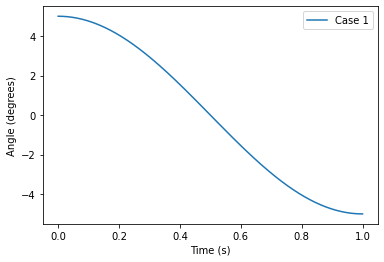

For Case 1, the half-period is 0.9999990000079182


In [113]:
degree = 5 #our angle in terms of degrees
theta_initial=np.pi*degree/180 #our angle in terms of radians
l=g/np.pi**2 #l is chosen so that $2\pi\sqrt{L/g}=2$
v=0 #velocity in the direction of theta
t=0 #time
ts=[0] #time-list
thetas=[theta_initial] #theta-list in radians
thetas_in_degree=[degree] #theta-list- in degrees
dt=0.000001
theta = theta_initial
while theta>-theta_initial: # we are looking for the first time it is smaller than negative theta, 
                            # it means that we complete half period, which is supposed to correspond to 1 sec.
    v=v+dt*aprox(theta,g)
    theta+=v*dt/l
    thetas.append(theta)
    thetas_in_degree.append(theta*180/np.pi)
    t+=dt
    ts.append(t)

plt.plot(ts,thetas_in_degree, label="Case 1") #to see the real graph of thetas
plt.xlabel("Time (s)")
plt.ylabel("Angle (degrees)")
plt.legend()
plt.show()

print("For Case 1, the half-period is", ts[-1])

As shown, our computation method is able to tell time by an error less than $10^{-6}$.

## Case 2: Simple pendulum, numerical solution for $sin(\theta)$
Now, let us examine the second approximation: finding a numerical solution for the simple pendulum using $sin(\theta)$.

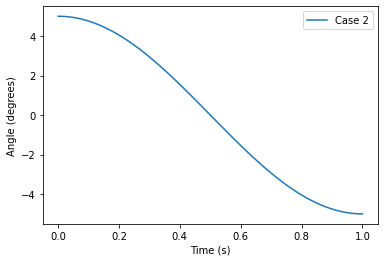

For Case 2, the half-period is 1.000476000007879


In [114]:
plt.cla()

degree = 5 #our angle in terms of degrees
theta_initial=np.pi*degree/180 #our angle in terms of radians
l=g/np.pi**2 # l is calculated based on the analytical solution above
v=0 #velocity in the direction of theta
t=0 #time
ts=[0] #time-list
thetas=[theta_initial] #theta-list in radians
thetas_in_degree=[degree] #theta-list- in degrees

dt=0.000001
theta = theta_initial
while theta>-theta_initial: # we are looking for the first time it is smaller than negative theta, 
                            # it means that we complete half period, which is supposed to correspond to 1 sec.
    v=v+dt*real(theta,g)
    theta+=v*dt/l
    thetas.append(theta)
    thetas_in_degree.append(theta*180/np.pi)
    t+=dt
    ts.append(t)

plt.plot(ts,thetas_in_degree, label="Case 2") #to see the real graph of thetas
plt.xlabel("Time (s)")
plt.ylabel("Angle (degrees)")
plt.legend()
plt.show()

print("For Case 2, the half-period is", ts[-1])

In this approximation, the error is more than $476\times10^{-6}$. Even if our computation method caused some error, it can be neglected when it is compared by this value. Now, let us calculate the error rate.

In [115]:
error_rate=(ts[-1]-1)/ts[-1]
print(error_rate)

0.00047577353967032


With this information, we can make some basic calculations to observe the accumulation of error over time.

For example, after how many minutes will our pendulum be late by $5$ minutes?

In [116]:
5/error_rate

10509.20150680232

To how many days does this error rate correspond?

In [117]:
(5/error_rate) / (60*24)

7.298056601946055

While the error in these approximations seems small, these inaccuries do accumulate over time. Only after seven days is our pendulum off by five minutes, an attribute that would not suffice in the real world. We hypothesize that since this next approximation will at least take into account the physical dimensions of the bob, we should see a significant increase in accuracy.

## Case 3: Semi-physical Pendulum

For this final approximation, we need some extra calculations. Using derivations from **KK** $\S7.7.1$ and $\S7.7.2$, we relate torque, $\tau$, and moment of inertia, $I$, of a solid ball of radius $r$ and mass $m$ to calculate

$\ddot{\theta}~=~\frac{\tau}{I}~=~\frac{-g(L~+~r)sin(\theta)}{\frac{2}{5}r^{2}~+~(L~+~r)^{2}}$,

used as the return value for the previously defined "physical" function. We derive L from the expression for angular frequency, defining $R$ to be the distance from the pivot point of the pendulum to the center of mass of the bob: 

$\omega~=~\sqrt{\frac{gR}{\frac{I}{m}~+~R^{2}}}~~\Rightarrow~~\frac{\pi^{2}}{g}~=~\frac{L~+~r}{L^{2}~+~\frac{7}{5}r^{2}~+~2Lr}$.

Notice that we set $\omega$ such that the period is still $2$ seconds. With this information, we can now test our hypothesis.

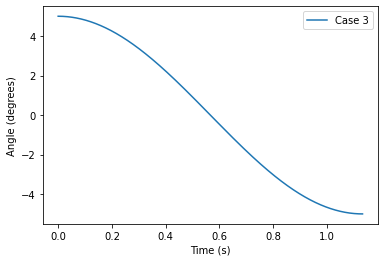

In [ ]:
plt.cla()

degree = 5 #our angle in terms of degrees
theta_initial = np.pi*degree/180 #our angle in terms of radians
r = 0.05 #radius of the bob in meters

c = (np.pi)**2/g # define this variable c for ease of implementation
l = ((1-2*r*c)+np.sqrt((2*r*c-1)**2-4*c*(1.4*c*r**2-r)))/(2*c)
v = 0 #velocity in the direction of theta
t = 0 #time
ts = [0] #time-list
thetas = [theta_initial] #theta-list in radians
thetas_in_degree = [degree] #theta-list- in degrees

dt=0.000001
theta = theta_initial
while theta>-theta_initial: # we are looking for the first time it is smaller than negative theta, 
                            # it means that we complete half period, which is supposed to correspond to 1 sec.
    v=v+dt*physcial(theta,g,r,l)
    theta+=v*dt/l
    thetas.append(theta)
    thetas_in_degree.append(theta*180/np.pi)
    t+=dt
    ts.append(t)

plt.plot(ts,thetas_in_degree, label="Case 3") #to see the real graph of thetas
plt.xlabel("Time (s)")
plt.ylabel("Angle (degrees)")
plt.legend()
plt.show()

print("For Case 3, the half-period is", ts[-1])

Our hypothesis is incorrect: adding physical dimensionality and a moment of inertia to the bob _increases_ the error in this scenario. This is likely due to a lack of realistic conditions. In reality, bobs are not perfectly round, and they are attached by a massive rod that is usually curved in some way. While we have added some physicality, this sort of "in-between" state between ideal physics and realistic conditions is likely the cause for this degradation in accuracy. After all, greater effort is required to oscillate a solid ball back and forth than is needed to oscillate a point mass on a massless string.

## Conclusions
With this rate of error, these approximations are not that useful in practice. Realistically, a pendulum clock using such approximations would be off by five minutes in less than a month, with additional errors only accumulating over time. In practice, clockmakers usually include an _escapement_ that exerts small impulses at the ends of the bob's trajectory to keep the pendulum swinging back and forth (this is what causes the "ticking" sound in pendulum clocks). There are other innovations used alongside escapement, but this is just one way to offset the error. Today, innovations in atomic clocks have reduced the error rate to 1 second in up to 100 million years, all because of the original innovations of the simple gravitational pendulum.